LaptopSpec in General
Dataset = https://www.kaggle.com/code/laxminarayanasahu/laptop-pricepredict/notebook

Tujuan Codes :

1. mengetahui brand laptop apa saja yang ada di dataset dan terdapat berapa unit per masing masing brand didalamnya
2. brand laptop yang memiliki harga termahal dalam INR (Indian Rupee)
3. mengetahui kelas processor apa saja yang ada di dataset + brand
4. mengetahui jenis & kelas ram apa saja yang ada di dataset + brand 
5. mengetahui jenis & kelas VGA apa saja yang ada di dataset + brand yang menggunakan VGA tersebut

Mengimport Library

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Membaca Dataset

In [30]:
dataset = pd.read_csv("masukkan Destinasi File Mu Disini")

In [31]:
dataset.head(10)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


In [32]:
dataset.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [33]:
list(dataset.columns)

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'Price',
 'rating',
 'Number of Ratings',
 'Number of Reviews']

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

Mengetahui Apakah di dataset terdapat duplikat

In [35]:
dataset.duplicated().sum()

21

In [36]:
dataset = dataset.drop_duplicates()

In [37]:
dataset.duplicated().sum()

0

mengetahui dimensi dari dataset

In [38]:
dataset.shape

(802, 19)

mengetahui brand laptop + jumlah unit apa saja yang ada di dataset

In [39]:
dataset['brand'].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

jika dilihat dari Jumlah unit nya, asus memiliki 243 unit, dell memiliki 149 unit, dan lenovo memiliki 144 unit (untuk 3 besarnya), diikuti oleh brand brand lainnya

# mengetahui rating dari masing masing brand laptop

In [40]:
dataset['rating'].value_counts()

rating
4 stars    437
3 stars    338
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

In [41]:
rating_counts = dataset.groupby('brand')['rating'].value_counts()
print(rating_counts)

brand   rating 
APPLE   4 stars     22
        5 stars      1
ASUS    4 stars    117
        3 stars    115
        5 stars      8
        2 stars      3
Avita   3 stars      6
DELL    4 stars     75
        3 stars     68
        5 stars      2
        2 stars      2
        1 star       2
HP      4 stars     88
        3 stars     44
        5 stars      3
        2 stars      1
Lenovo  4 stars     72
        3 stars     67
        2 stars      3
        5 stars      2
MSI     4 stars     34
        3 stars     16
acer    4 stars     29
        3 stars     22
Name: count, dtype: int64


didapatkan bahwa asus merupakan brand terbaik dalam dataset ini dengan memiliki rating 4 star terbanyak yaitu 117 unit,3 star nya sebanyak 115 unit, 5 star nya sebanyak 8 unit dan 2 star nya hanya 3 unit. dengan mengikuti pada brand brand lainnya

# mengetahui laptop dengan harga termahal

<Axes: xlabel='brand', ylabel='Price'>

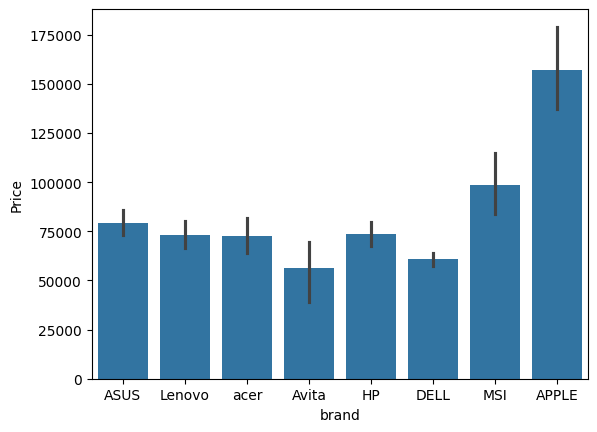

In [42]:
sns.barplot(data=dataset, x=dataset['brand'], y=dataset["Price"], orient='v')

dapat diketahui bahwa dari grafik ini bisa dilihat apple mempunyai harga laptop yang paling mahal

In [43]:
price_counts = dataset.groupby('brand')['Price'].value_counts()
print(price_counts)

brand  Price 
APPLE  179990    2
       225990    2
       149990    2
       104990    2
       85990     1
                ..
acer   56491     1
       55999     1
       55490     1
       53990     1
       169990    1
Name: count, Length: 604, dtype: int64


dan dari dataframe diatas apple juga memilki price paling mahal yaitu sekitar 179990 INR atau sekitar 27 juta

In [44]:
inr_amount = 179990  # Indian Rupee amount
exchange_rate = 15000 / 1  # 15,000 INR to 1 IDR exchange rate

idr_amount = inr_amount * exchange_rate

print("Indian Rupee:", inr_amount)
print("Indonesian Rupiah:", idr_amount)

Indian Rupee: 179990
Indonesian Rupiah: 2699850000.0


# jumlah unit processor yang ada dalam dataset

In [45]:
dataset['processor_name'].value_counts()

processor_name
Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

dari dataframe diatas dapat diketahui bahwa core I5 memiliki jumlah unit terbanyak yaitu sebanyak 284 yang tersebar di beberapa brand laptop, diikuti oleh I3 sebanyak 161 unit, core i7 sebanyak 104 unit dan seterusnya

#mengetahui jumlah brand laptop yang menggunakan processor (Intel,AMD dan M1)

In [46]:
intel_count = dataset['processor_brand'].value_counts()['Intel']
amd_count = dataset['processor_brand'].value_counts()['AMD']
m1_count = dataset['processor_brand'].value_counts()['M1']

print("Number of laptop brands using Intel processor:", intel_count)
print("Number of laptop brands using AMD processor:", amd_count)
print("Number of laptop brands using M1 processor:", m1_count)

Number of laptop brands using Intel processor: 594
Number of laptop brands using AMD processor: 189
Number of laptop brands using M1 processor: 19


dari eksekusi kode diatas dapat diketahui bahwa Intel memiliki unit processor yang dipasang pada laptop terbanyak yaitu sebanyak 594 unit diikuti oleh AMD dan M1.

In [47]:
processor_counts = dataset.groupby('brand')['processor_name'].value_counts()

print(processor_counts)

brand   processor_name
APPLE   M1                19
        Core i5            4
ASUS    Core i5           73
        Core i3           47
        Core i7           32
        Ryzen 7           24
        Ryzen 9           24
        Ryzen 5           14
        Celeron Dual      12
        Pentium Quad       9
        Core i9            4
        Ryzen 3            4
Avita   Core i5            3
        Core i7            2
        Celeron Dual       1
DELL    Core i5           61
        Core i3           48
        Ryzen 5           16
        Ryzen 3           12
        Core i7            7
        Ryzen 7            3
        Pentium Quad       2
HP      Core i5           38
        Core i3           30
        Ryzen 5           26
        Core i7           20
        Ryzen 7           10
        Ryzen 3            7
        Celeron Dual       3
        Pentium Quad       1
        Ryzen 9            1
Lenovo  Core i5           60
        Core i3           30
        Core i7     

dari dataframe diatas juga dapat ilihat jumlah unit processor yang terpasang dipegang oleh AUS, kemudian Dell dan yang ketiga adalah HP

# mengetahui jumlah RAM yang tersebar di brand laptop

In [48]:
dataset['ram_gb'].value_counts()

ram_gb
8 GB     404
4 GB     223
16 GB    173
32 GB      2
Name: count, dtype: int64

dari hasil eksekusi kode diatas, dapat diketahui bahwa ram dengan kapasitas 8 Gb menjadi pilihan brand laptop untuk dipasang (terlepas itu dual channel atau single channel), kemudian diikuti oleh ram berkapasitas 4 Gb, 16Gb dan yang terakhir 32Gb

In [49]:
ram_gb_counts = dataset.groupby('brand')['ram_gb'].value_counts()

print(ram_gb_counts)

brand   ram_gb
APPLE   16 GB     11
        8 GB      10
        32 GB      1
        4 GB       1
ASUS    8 GB      98
        4 GB      87
        16 GB     58
Avita   8 GB       4
        4 GB       1
        16 GB      1
DELL    8 GB      96
        4 GB      38
        16 GB     15
HP      8 GB      63
        4 GB      38
        16 GB     35
Lenovo  8 GB      78
        4 GB      40
        16 GB     26
MSI     8 GB      27
        16 GB     18
        4 GB       5
acer    8 GB      28
        4 GB      13
        16 GB      9
        32 GB      1
Name: count, dtype: int64


# mengetahui jenis Tipe Ram yang digunakan

In [50]:
dataset['ram_type'].value_counts()

ram_type
DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

dapat diketahui bahwa kebanyakan dari brand laptop menggunakan RAM DDR4 sebagai pilihan untuk laptop yang dibuatnya dengan jumlah total sebesar (690 Unit)

In [51]:
ram_type_counts = dataset.groupby('ram_type')['brand'].value_counts()

print(ram_type_counts)

ram_type  brand 
DDR3      acer        3
          ASUS        1
          Lenovo      1
          DELL        1
          APPLE       1
DDR4      ASUS      183
          DELL      142
          Lenovo    132
          HP        127
          acer       43
          MSI        38
          APPLE      19
          Avita       6
DDR5      ASUS        5
          MSI         2
          acer        1
LPDDR3    ASUS       12
          Lenovo      1
          HP          1
LPDDR4    ASUS       10
          MSI         7
          Lenovo      4
          acer        2
          HP          2
          DELL        2
LPDDR4X   ASUS       32
          Lenovo      6
          HP          6
          DELL        4
          MSI         3
          APPLE       3
          acer        2
Name: count, dtype: int64


<Axes: xlabel='brand', ylabel='ram_gb'>

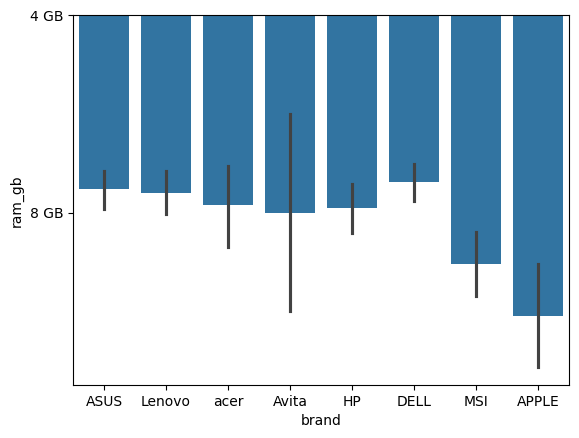

In [52]:
sns.barplot(data=dataset, x=dataset['brand'], y=dataset["ram_gb"], orient='v')

#mengetahui brand laptop yang menggunakan VGA Diksrit (terpisah)

In [56]:
dataset['graphic_card_gb'].value_counts()

graphic_card_gb
0 GB    557
4 GB    127
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64

dari hasil eksekusi kode diatas dapat diketahui bahwa banyak brand laptop yang tidak memasukkan VGA diskrit ke laptopnya atau (mungkin) hanya menggunakan IGPU (Integrated GPU) yang terpasang bersama dengan processor

In [54]:
graphic_card_counts= dataset.groupby('graphic_card_gb')['brand'].value_counts()

print(graphic_card_counts)

graphic_card_gb  brand 
0 GB             ASUS      163
                 DELL      112
                 Lenovo    102
                 HP        100
                 acer       32
                 APPLE      23
                 MSI        19
                 Avita       6
2 GB             DELL       26
                 Lenovo     15
                 ASUS       12
                 HP          8
                 acer        4
                 MSI         2
4 GB             ASUS       49
                 Lenovo     23
                 HP         23
                 MSI        16
                 DELL        9
                 acer        7
6 GB             ASUS       17
                 MSI         8
                 acer        6
                 DELL        2
                 HP          2
                 Lenovo      2
8 GB             MSI         5
                 HP          3
                 ASUS        2
                 Lenovo      2
                 acer        2
Name: count, dt

Ini merupakan persebaran dari jumlah kapasitas graphic card nya yang didominasi dengan IGPU

In [58]:
dataset['warranty'].value_counts()

warranty
1 year         498
No warranty    268
2 years         23
3 years         13
Name: count, dtype: int64

#mengetahui Warranty (Garansi) dari masing masing produk

In [59]:
warranty_brand_counts= dataset.groupby('warranty')['brand'].value_counts()

print(warranty_brand_counts)

warranty     brand 
1 year       ASUS      150
             HP        110
             DELL       96
             Lenovo     71
             acer       37
             APPLE      23
             MSI        11
2 years      MSI        12
             Lenovo     11
3 years      Lenovo     11
             MSI         1
             DELL        1
No warranty  ASUS       93
             DELL       52
             Lenovo     51
             MSI        26
             HP         26
             acer       14
             Avita       6
Name: count, dtype: int64


dari dataframe diatas dapat diketahui bahwa brand laptop banyak memilih Warranty (garansi) 1 tahun untuk laptop yang dibuatnya

# jumlah laptop yang menyediakan Microsoft office didalamnya

In [60]:
msoffice_brand_counts= dataset.groupby('msoffice')['brand'].value_counts()

print(msoffice_brand_counts)

msoffice  brand 
No        ASUS      187
          DELL       86
          Lenovo     70
          HP         53
          MSI        50
          acer       47
          APPLE      23
          Avita       6
Yes       HP         83
          Lenovo     74
          DELL       63
          ASUS       56
          acer        4
Name: count, dtype: int64


dapat diketahui bahwa kebanyakan brand laptop memilih untuk tidak memasukkan memasukkan ms.office kedalam laptop.